In [445]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import scipy.special as sp

Hello everyone. This is going to be the first of many Jupyter notebooks I plan to release from my computer, dealing with statistical theory and methods, probability, programming, and adjacent topics. I will also put concepts to the test with either actual data or simulated data. The goals here are to answer questions, provide useful code snippets, and give you a better idea of what to do with your data / experiments, as well as give a brief survey into the ideas and history involved in Statistics.

This first notebook will explain Goodness of Fit tests and the Multinomial Framework, Likelihood Ratio Tests and the resultant Chi Squared and G Statistics, which are essential in testing frequencies for fit or testing for association between categorical or discrete variables. Also going to simulate ideal datasets to contrast the two test statistics.

The basic Chi-Squared Test for Goodness of Fit is a generalization of Z and T tests for Proportions. Usually, the Chi-Squared Statistic is used as the Test Statistic, defined as:

${\chi}^2 = \Sigma_i \frac{(O_i - E_i)^2}{E_i}$

Here, $O_i$ is the number of observations in the sample in class i, for i = 1,2,...,r, where r is the number of classes or categories present. In this case, the categories are exclusive, meaning that for each person or thing that is randomly sampled, only one category can be chosen. $E_i = Np_i$ is the expected cell count for class i, which in a random sample, is just the sample size, N, multiplied by the probability under $H_0$ for class i. When we have only 2 categories, in the case of a Yes or No question in a sample, we would expect that if the probability under $H_0$ is correct, then the expected cell count is $E_i$. So for a binary choice, we have expected values $Np$ and $N(1-p)$. Likewise, any amount that doesn't go to one cell will fall into the other cell, since the two numbers must add up to N. Typically, for proportions, this yields a Z-statistic, which we can test relatively easily, however, the true distribution for the discrete count of 'Yes' values in our sample is a Binomial Distribution (I'll make a notebook for that specifically comparing the Binomial and Negative Binomial Tests, compared on their Power, later on). We use a Z statistic rather than attempting to use a Binomial Distribution, especially for large enough sample sizes, because the Z distribution provides a decently accurate approximation of our true distribution under $H_0$.

For the case where we have more than two categories in our sample, as is the case where we don't have a Simple 'Y/N' question (ex. polling the general public on which Democratic or Republican Candidate will win their party's primary nomination), we use the Chi-Squared Statistic instead, although we can also use it for the case where we have a binary response as well. In this way, the Z/Normal Distribution and the Chi Squared Distribution are related. We typically encounter the Chi Squared Test during our first stats class, either in High School or in College, although some people taking more advanced biology courses may encounter the test in that class as well. For example:

-Gallup polls a random sample of 100 Florida Voters registered to the Democratic Party on who they would prefer as their party's candidate for governor in 2022. Three options are given- Charlie Crist, Nikki Fried, and Cadance Daniel. We want to know if they prefer one candidate over the others, and our sample results in the following counts:

1. 50 votes for Crist
2. 30 votes for Fried
3. 20 votes for Daniel

Right off the bat, it appears that our random sample of voters clearly prefer one candidate, but since we asked only a random sample of people, and Florida has tens of millions of democratic voters, we need a way to figure out if this difference is due to actual preferences or merely due to chance. Here, our null hypothesis is $H_0: p_{crist} = p_{fried} = p_{daniel} = \frac{1}{3}$, meaning that we are working from the initial assumption that all candidates are equally popular. This might not be the consensus, in which case, we can easily adjust our null hypothesis, but let's just assume for the sake of argument that it is. Therefore, we would expect each cell count to be, on average, $Np_i$ = 100/3 ~ 33.33. Does this sample give us enough evidence to say that this is in fact, true?

In [446]:
#function for computing the chi square statistic
def Chi_Sq(x,n,p):
    return np.sum(((x-n*p)**2)/(n*p))

#x is our sample cell counts
x = np.array([50,30,20])
#c is our number of cells, p is our null probability, n our sample size
c = 3
n = 100
p = np.ones(c)/c

Well, before we compute a Test-statistic, we also need a Confidence / Alpha value- the lower alpha is, the smaller the chance that we will reject $H_0$ based on chance alone, and this will also yield a Critical Value for the test- the value for our test statistic above which we reject $H_0$. We will talk more about this distribution in a little bit, but the Critical Value of our Test Statistic under $H_0$ should depend only on the 'meta-data' of our sample- the sample size, and the number of choices or categories, and not on the sample itself, for if it is a true random sample of 100 Registered Democrat Voters in the State of Florida, then each response should be independent of other responses. In this case, since we have 3 choices, we therefore have 3-1=2 degrees of freedom (denoted 'df'). And so our Test Statistic has a $\chi_{df=2}^2$ distribution! So if we picked an $\alpha$ value of .05, we therefore get a Critical value of:

In [447]:
alpha=.05
crit_val = ss.chi2(df=2).ppf(1-alpha)
print(crit_val)

5.991464547107979


We are now ready to conduct the test! None of the cells have a value of 0, and each Here, the more 'off' the true proportion is from the neutral one in $H_0$, the higher the values of $\frac{(O_i - E_i)^2}{E_i}$ are going to be, and since the statistic consists of adding these three cells up, the higher the value of the Chi-Squared Statistic will be. However, note that since our expected value for each cells is NOT a whole number here, the smallest value possible for the statistic is technically:

In [448]:
print(Chi_Sq(np.array([33,33,34]),n,p))

0.020000000000000004


While this is really close to 0, it is NOT 0. This is because, just like the binomial distribution and the Z-test approximation to that, the Chi-Squared Statistic is also an approximation. We will later check and see if there is a significant deviation really, but let's run the test and come up with an answer to our little test scenario here:

In [449]:
print(Chi_Sq(x,n,p))

14.000000000000002


So, since this number exceeds our Critical Value, we have, at a 5% alpha level, sufficient evidence to reject the claim that all voters are neutral towards their three nominee options. In other words, this specific result is determined to not be a result of chance alone!

So looking back, it does seem strange that our test statistic can't go to 0 here. When we randomly select a sample of 100 people from a large population, in the millions, a very specific distribution arises- The Multinomial Distribution, which is a generalization of the Binomial Distribution but with an arbitrary ($\geq 2$) number of choices or categories. This is the a true statistical distribution rather than a approximation, in the sense that, if we did our sampling correctly and it truly is a random sample from the population, this distribution contains the true probabilities that will arise, much like if we select a random card from a shuffled deck, and note down what suit it is, over and over and over again, shuffling the deck each time, the true proportion of cards in each suit will be $\frac{1}{4}$. However, with the Chi-Squared Statistic Specifically, there is more to the story. It turns out, if we apply statistical theory, which would typically be taught in a upper-level undergrad course in Statistical Theory or Probability Theory, we can show that there are many convenient approximations being made, apart from the Multinomial Distribution being a Discrete Distribution, versus the Chi-Squared Distribution, which is continuous.

It turns out that the Chi-Squared Statistic is actually a Taylor Approximation to the true statistic, denoted the G-statistic, which is derived from the Likelihood Ratio Test. The fact that these functions of each cell's total and their expected values seemingly result in something as nice as the Chi-squared Statistic, which is basically the sum of Squares of INDEPENDENT Standardized Normal Variables, is the result of two or three statistical theorems, which one would typically learn in a Mathematical Statistics graduate course:

1. Cochran's Theorem, justifying the degrees of freedom, in conjunction to
2. Wilk's Theorem, justifying the use of a Chi Squared Distribution for a Likelihood Ratio Test
3. Past Implementation Considerations- in particular, the fact that logarithms weren't really a thing in most calculators for a while, so simpler methods were usually preferred

The purpose of this notebook is to derive the G-Statistic in the framework of Likelihood Ratio Tests (which were developed by Jerzy Neyman in the 1940's, around the time that the first electric calculators became a thing), show that the Chi-Squared Statistic is a reasonable approximation to this, and then seeing if the two are decent approximations of one another. So let's set that test scenario up, first by setting up our random seed:

In [450]:
np.random.seed(1738)

First off, the Multinomial Distribution. If we have c classes of people or objects or things, and these classes are mutually exclusive and exhaustive, meaning that no person prefers two different choices, or is indifferent between two choices, and also that the list of choices that are given are all the choices present, then selecting a random sample of size n, WITH replacement, and jotting down the counts for each class, in essence tallying up a vote, will yield a Multinomial Distribution with parameters n, a positive integer representing the sample size, and p, a c-dimensional probability vector, with each entry being a positive number between 0 and 1 and adding up to 1. In this sense, while the sample itself might be random, the cell values are not independent from one another, as if we have more in one cell, holding the sample size equal, that must therefore mean that there's less to go around for the other cells. 

The Multinomial Distribution results in a random c-dimensional vector where each entry is a positive integer, and all the entries add up to n, the sample size. Now, when discussing 'how unusual' this particular combination of values are given $H_0$, which is neutral in our example with the three nominees, it is useful to compute the likelihood. The Probability of a particular case is given by:

$P(O_1,0_2,...,O_c)$ = $\binom{n}{O_1,O_2,...,O_c}$$(p_1)^{O_1}$$(p_2)^{O_2}$...$(p_c)^{O_c}$

Here, $\binom{n}{O_1,O_2,...,O_c}$ is known as the Multinomial Coefficient, which is the total number combinations for a specific value of our sample counts,x possible. So for our particular sample, we get:

$P(50,30,20)$ = $\binom{100}{50,30,20}$$(\frac{1}{3})^{50}$$(\frac{1}{3})^{30}$$(\frac{1}{3})^{20}$

Which is equal to:

In [451]:
#function for multinomial coefficients
def multnom(n,k):
    m = len(k)
    u = 1
    for i in range(m):
        u *= sp.factorial(k[i])
    return int(sp.factorial(n) / u)

#probability
prob = multnom(n,x)*np.prod(p**x)
print(prob)

9.226109792124319e-06


This seems like a very unlikely event, and it is, just on it's own. However, note that there are a lot of different ways that we can arrange these cell counts so that they add up to 100. The total number of ways that we can set this up, including cases where some cell counts are 0, are given by the Method of Stars and Bars as:

$\binom{n+c-1}{c-1}$ = $\binom{100+3-1}{3-1}$ = $\binom{102}{2}$ = $\frac{102*101}{2}$ 

In [452]:
print(sp.binom(102,2))

5151.0


Since there are over 5000 different possibilities here, this is not that feasible. Also, consider if the cell count was (33,33,34), which we can agree is the closest count to our neutral null hypothesis stipulation, and the closest to our expected values. In this case, the likelihood is:

In [453]:
y = np.array([33,33,34])
print(multnom(n,y)*np.prod(p**y))

0.008134712430416262


This is also a small probability, albeit 3 orders of magnitude more than our sample. So how do we use this framework to derive the Chi-Squared Test and figure out if the result is likely to be by chance ? This is where Likelihood Ratio Tests (LRT for short) and Wilk's Theorem come in. We can compare the likelihood of our sample given that the null hypothesis is true versus if it is untrue and come up with some test so that if the difference is large enough, it's indicative of a difference from the null hypothesis in our random sample, and we assume, the population that we sampled from. 

We've already see the maximum likelihood for the null hypothesis- it's that very small probability, denoted 'prob'. However, what do we do to address the alternative hypothesis? Well, it turns out that we can try to find probability vector q that maximizes the likelihood, given our sample cell counts, $O_1,...,O_3$. The result, which can be shown using Lagrangian Multipiers, is given as $q_i = \frac{o_i}{n}$. This yields the likelihood:

$P(O_1,0_2,...,O_c)$ = $\binom{n}{O_1,O_2,...,O_c}$$(\frac{O_1}{n})^{O_1}$$(\frac{O_2}{n})^{O_2}$...$(\frac{O_c}{n})^{O_c}$

And in our specific case, yields a maximum likelihood of:

In [454]:
#probability
prob_alt = multnom(n,x)*np.prod((x/n)**x)
print(prob_alt)

0.009117627855880642


Now, if we want to compare two very small numbers which are very often close to 0, it makes sense to use a ratio rather than a difference. This alternative maximum likelihood is far higher than our likelihood if the null hypothesis were true. So we can form a ratio:

$\lambda$ = $\frac{P(O_1,...,O_c | H_0)}{P(O_1,...,O_c | H_{\alpha})}$

Wilk's Theorem states that, given a decently large sample size, the distribution of $-2*log(\lambda)$ will tend to a Chi-Squared Distribution with c-1 degrees of freedom. The reason why we have c-1 degrees of Freedom is Cochran's Theorem- since the cell counts must add up to the total sample size, then this takes away one degree of freedom. But while Wilk's Theorem may be an asymptotic result, where we are approximating this distribution, it turns out to be the the simplest test with the highest power, per Neyman's Theorem. Again, all of these theorems are from Graduate Statistics, and the proof isn't necessarily all that interesting in our case. 

What is left is then deriving the test statistic, which the Wikipedia page for the G-Test does very nicely:

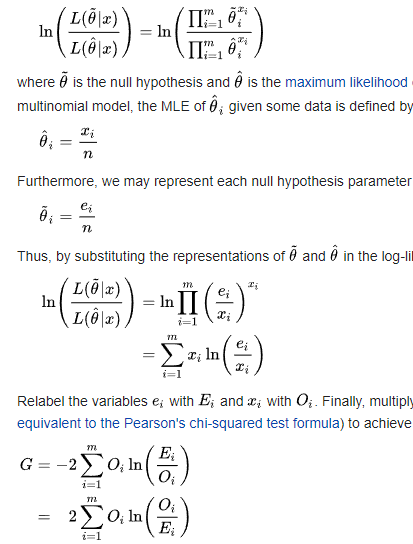

In [455]:
#function for the G-statistic
def G_Stat(x,n,p):
    return 2*np.sum(x*np.log(x/(n*p)),where=(x>0))
print(G_Stat(x,n,p))

13.791854920707266


Note that this is very similar to our Chi-Squared Statistic value of 14, and the test would still reject this result. However, it isn't the same thing, just a approximation that doesn't involve the natural logarithm and hence was easier to compute and conceptualize before the time of programming and handheld, widely available, cheap calculators with those capabilities. While both Test Statistics use Wilk's Theorem and Cochran's Theorem, the G Statistic is naturally 'closer' to the real answer. The derivation of the Chi-Squared Statistic, while easier to compute, involves a decent deal of mathematics, namely, power series for the natural logarithm, AKA the Mercator Series:

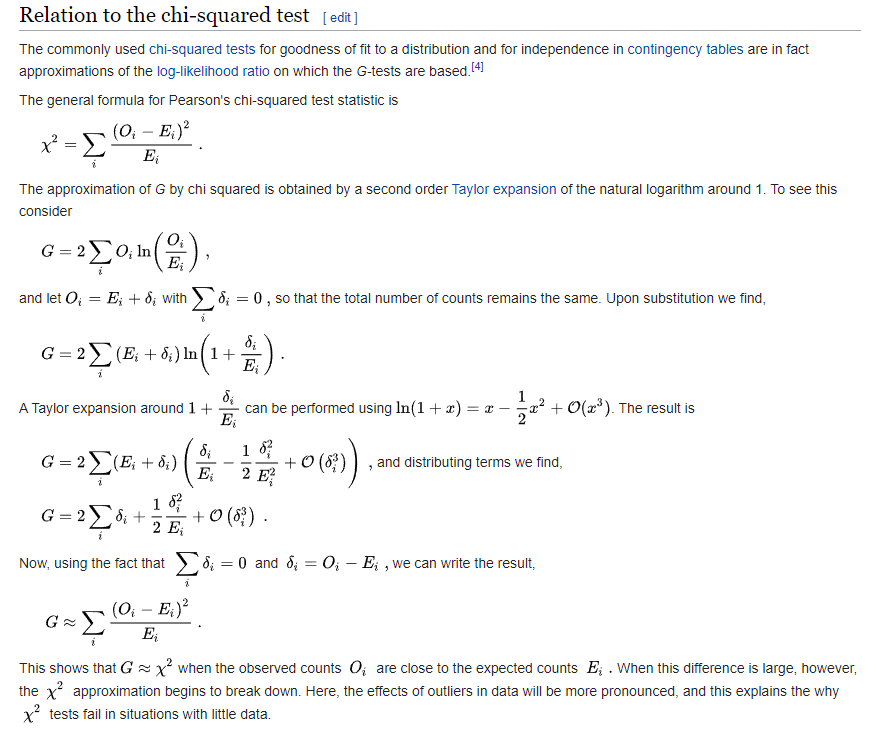

Now, we need to find a way to test these two approximations against each other. First, the case where $H_0$ is true. So let's generate 10,000 random samples of 100 from the distribution specified in the null hypothesis:

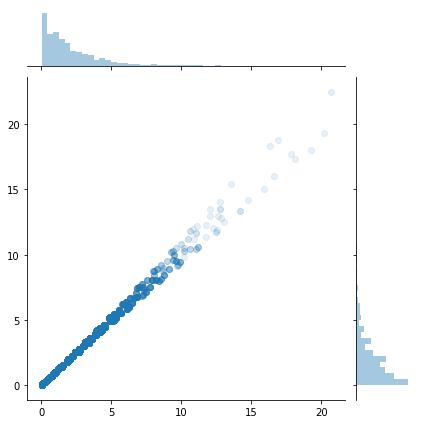

In [456]:
simsize = 10000
cstat = np.zeros(simsize)
gstat = np.zeros(simsize)
for i in range(simsize):
    x = np.random.multinomial(n,pvals=p,size=1) 
    cstat[i] = Chi_Sq(x,n,p)
    gstat[i] = G_Stat(x,n,p)
    
sns.jointplot(cstat,gstat,alpha=.1)

On the x-axis, we have the Chi-Squared Statistic, and on the y-axis, the G-Statistic. These are paired on the same sample for each point in the jointplot, which combines a scatterplot and marginal histograms, and as we can see, the two have similar marginal distributions, and there does appear to be a lot of correlation between the two, which makes sense, because both are essentially measuring how off the cell counts are for each sample. However, this correlation is not perfect- the few large data points on the top right portion of the graph appear to display a higher degree of variability between the G and Chi-Squared Statistics. Also, we can look at the difference between Chi-Squared and G:

(array([1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 4.000e+00, 7.000e+00, 2.000e+00,
        2.000e+00, 1.900e+01, 6.000e+00, 1.500e+01, 2.700e+01, 2.300e+01,
        4.800e+01, 5.800e+01, 8.100e+01, 2.010e+02, 4.310e+02, 9.500e+02,
        5.738e+03, 1.469e+03, 5.480e+02, 1.720e+02, 7.700e+01, 5.600e+01,
        1.500e+01, 1.600e+01, 6.000e+00, 7.000e+00, 3.000e+00, 1.000e+00,
        2.000e+00, 4.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-1.96034927, -1.89656527, -1.83278127, -1.76899728, -1.70521328,
        -1.64142928, -1.57764528, -1.51386128, -1.45007729, -1.38629329,
        -1.32250929, -1.25872529, -1.19494129, -1.1311573 , -1.0673733 ,
        -1.0035893 , -0.9398053 , -0.8760213 , -0.81223731, -0.74845331,
        -0.68466931, -0.62088531, -0.55710131, -0.49331732, -0.42953332,
        -0.

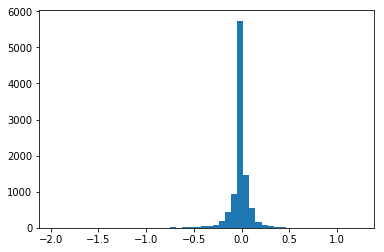

In [457]:
plt.hist(cstat-gstat,bins=50)

In [458]:
np.mean(gstat-cstat)

0.013389979385872004

So, it makes sense that this would be relatively close on average to 0. The largest deviation in values in our simulation is:

In [459]:
np.max(np.abs(gstat-cstat))

1.96034926902081

Coincidentally, this is close to the Critical Value for a two-sided Z test with an alpha of .05, but more importantly, this means that there was a decently large sample where the Chi-Squared Statistic and the G-Statistic differed by roughly $\frac{1}{3}$ of the total critical value. This can actually make the difference between rejecting a null hypothesis or not, so it makes sense to look at the type 1 errors for each, which in our case, is how many or what percent of the simulations rejected the null hypothesis, which was true here:

In [460]:
print(sum(cstat > crit_val),sum(gstat > crit_val))

495 500


So our Chi-Squared Statistic was slightly more conservative in rejecting $H_0$, compared to the G-test, which in this case rejected exactly 5% of our simulated samples. What about the case where the null hypothesis is in fact untrue, for example, in the proportions that we encountered (50,30,20 %)?

In [461]:
q = np.array([.5,.3,.2])
def simulate_samples(simsize,n,p,q):
    cstat = np.zeros(simsize)
    gstat = np.zeros(simsize)
    for i in range(simsize):
        x = np.random.multinomial(n,pvals=q,size=1) 
        cstat[i] = Chi_Sq(x,n,p)
        gstat[i] = G_Stat(x,n,p)
    return cstat,gstat

cstat,gstat = simulate_samples(simsize,n,p,q)
        
print(sum(cstat < crit_val),sum(gstat < crit_val))

680 692


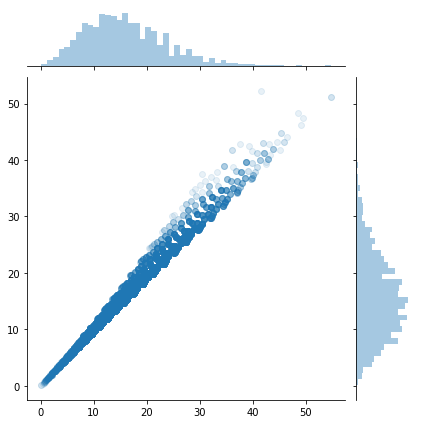

In [462]:
sns.jointplot(cstat,gstat,alpha=.1)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00,
        4.000e+00, 2.000e+00, 5.000e+00, 7.000e+00, 9.000e+00, 7.000e+00,
        1.200e+01, 1.600e+01, 3.600e+01, 4.100e+01, 7.300e+01, 7.400e+01,
        8.800e+01, 2.060e+02, 2.420e+02, 3.240e+02, 4.910e+02, 7.840e+02,
        9.760e+02, 1.497e+03, 1.713e+03, 1.061e+03, 8.960e+02, 5.960e+02,
        3.370e+02, 2.580e+02, 1.130e+02, 6.800e+01, 2.200e+01, 2.800e+01,
        5.000e+00, 3.000e+00]),
 array([-10.60719233, -10.32502514, -10.04285796,  -9.76069077,
         -9.47852358,  -9.19635639,  -8.91418921,  -8.63202202,
         -8.34985483,  -8.06768764,  -7.78552045,  -7.50335327,
         -7.22118608,  -6.93901889,  -6.6568517 ,  -6.37468452,
         -6.09251733,  -5.81035014,  -5.52818295,  -5.24601576,
         -4.96384858,  -4.68168139,  -4.3995142 ,  -4.11

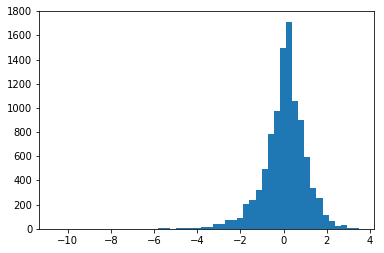

In [463]:
plt.hist(cstat-gstat,bins=50)

Here, looking at the number of incorrect results from the test- remember, $H_0$ is untrue here, but we are testing against that, the Chi-Squared Statistic managed to not reject $H_0$ at a slightly smaller rate than the G-statistic. What about a more extreme example, say 80-10-10% ?

In [464]:
q = np.array([.8,.1,.1])
cstat,gstat = simulate_samples(simsize,n,p,q)       
print(sum(cstat < crit_val),sum(gstat < crit_val))

0 0


In this case, neither of the Test-Statistics managed to fail to reject $H_0$, which is the result that we want, as this indicates that this test has a high degree of statistical power, which I will go into more in depth in a later notebook. Looking at the jointplot and a histogram of the differences:

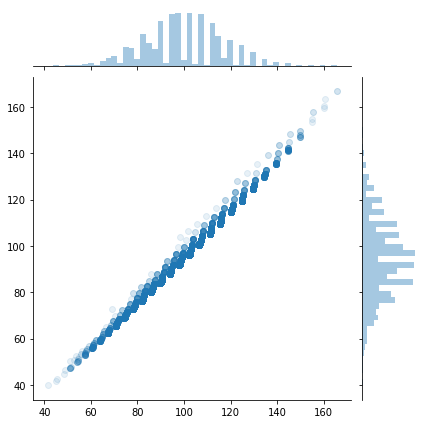

In [465]:
sns.jointplot(cstat,gstat,alpha=.1)

(array([1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 0.000e+00,
        6.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 8.000e+00,
        2.000e+00, 7.000e+00, 8.000e+00, 7.000e+00, 1.000e+00, 1.500e+01,
        1.600e+01, 6.000e+00, 2.900e+01, 8.000e+00, 4.700e+01, 1.000e+00,
        2.800e+01, 5.000e+01, 2.000e+01, 1.160e+02, 2.000e+00, 6.600e+01,
        8.900e+01, 9.100e+01, 2.400e+02, 1.910e+02, 2.670e+02, 2.760e+02,
        3.960e+02, 4.970e+02, 6.600e+02, 7.930e+02, 8.500e+02, 1.196e+03,
        1.730e+03, 2.261e+03]),
 array([-5.54245116, -5.30981137, -5.07717158, -4.8445318 , -4.61189201,
        -4.37925223, -4.14661244, -3.91397266, -3.68133287, -3.44869309,
        -3.2160533 , -2.98341351, -2.75077373, -2.51813394, -2.28549416,
        -2.05285437, -1.82021459, -1.5875748 , -1.35493501, -1.12229523,
        -0.88965544, -0.65701566, -0.42437587, -0.19173609,  0.0409037 ,
         0.

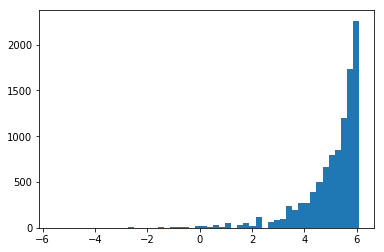

In [466]:
plt.hist(cstat-gstat,bins=50)

These appear to be different distributions, and it looks like the more of a 'difference' between the chosen null and true null, the more of a difference there are between the distributions for the G and Chi-Squared Statistics. The variability at the upper right of the scatterplot between the G and Chi-Squared Stats also appear to be heteroskedastic to a varying degree. And again, this difference could also be the difference between a test statistic exceeding the threshold value of a critical value vs not. So it is worth it to take it into consideration. However, while the reason that we use Chi-Squared vs G can be debated, the reason that those are used instead of the Multinomial Framework, despite that being the actual, true likelihood involved in the test, is that the Multinomial Approach is effectively infeasible for the larger sample sizes needed to provide confidence and power to the results, it is interesting to think about how one would figure it out for a small enough sample.

So let's say that instead of sampling 100 voters, we sample a mere 10. Out of these 10, we get 8 votes for Crist, 1 vote for Fried and 1 vote for Daniel. This is essentially the same proportions of preferences to the nominees as in the most extreme example used in our simulation, but it isn't too hard to imagine how out of 10 people, that could happen, even if the population in general had equal probability of preference for each candidate as we have assumed in our null hypothesis. So for the multinomial probabilities, we are going to need to find out how many different choices we have for the cell-totals:

$\binom{10+2-1}{2-1}$ = $\frac{12*11}{2}$ = 66

Out of these 66 total choices, how do we judge how 'extreme' each of these is? Well, it turns out for a array of length 10, where each entry can be a value 1,2, or 3, there are $3^10$ or $243^2$ = 59049 total choices for each person potentially. However, if all three nominees are equally preferable, each should be equally likely. The obvious ones are the edge cases, for example, when all 10 florida voters in the sample choose the same candidate, denoted (10,0,0) or (0,10,0) or (0,0,10). In this case, if all 10 vote one way, the likelihood of people voting this extremely is $\frac{3}{3^10}$ or:

In [467]:
3**-9

5.080526342529086e-05

If we have 66 of these cell totals, then it should not be that hard to figure these out, using the multinomial theorem, or at the very least figure out a way to count the more extreme ones. The idea is that since we have 3 categories, and each of the three cell counts is a integer 0,1,...,10 such that the sum of the three cell counts adds up to 10, our sample size, these 66 points for what is known as a simplex in 3-dimensional space, where each axis is a cell-count. So in this particular case, since there are 3 cells, then it turns out to be 3-dimensional. 

Further, we can think up of a cone with the apex at the origin, and in the direction of the mean of the distribution, in this case, ($\frac{10}{3}$,$\frac{10}{3}$,$\frac{10}{3}$). By increasing the angle, we include more and more points that are further and further away from the mean, and at some point, include even the points in the periphery of the simplex- (10,0,0) and so on. So after (10,0,0),(0,10,0) and (0,0,10), which are 3 of our 66 simplex points, we can think of permutations of (9,1,0), of which there are 6, since we have 3 distinct elements and 3 spots for each. The probability of (10,0,0) is:

$\binom{10}{10,0,0}$$(\frac{1}{3})^{10}$$(\frac{1}{3})^0$$(\frac{1}{3})^0$ or $\frac{1}{3^{10}}$, as previously discussed, whereas for (9,1,0), we have:

$\binom{10}{9,1,0}$$(\frac{1}{3})^9$$(\frac{1}{3})^1$$(\frac{1}{3})^0$ or $\frac{10}{3^{10}}$ or

In [468]:
10/3**10

0.00016935087808430286

And there are 6 of these. The next step is important, because we can consider both (8,2,0) and (8,1,1). The distance from our mean of the multinomial distribution will be higher, so we will include (8,2,0) first, of which there are again 6 of and have a certain probability, and then (8,1,1), of which there are three of, since we only have two distinct objects and three different ways to order them. Thus, for (8,2,0), we get a multinomial coefficient value of 45, whereas for (8,1,1), you get 90. Multiplying this by the number of different ways for each combination, we get:

3*1 + 6*10 + 6*45 + 3*90 = 

In [469]:
3*1 + 6*10 + 6*45 + 3*90

603

And so our p-value here is:

In [470]:
603/3**10

0.010211857948483463

So while not as unlikely, it would be unlikely to happen if simulated:

In [471]:
q = np.array([.8,.1,.1])
cstat,gstat = simulate_samples(simsize,10,p,q)       
print(sum(cstat < crit_val),sum(gstat < crit_val))

C:\Users\Sebastian\Anaconda3plus\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sebastian\Anaconda3plus\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


1260 2663


And so, this wouldn't have nearly as much power as we want. If we had observed something closer to (50-30-20) %, or had something like (5,3,2) in our sample, this would make this approach rather intractable, and so we would prefer to look at the inside of the cone to figure the probabilities out:

(4,3,3) is closest to the mean
(4,4,2) is also relatively close

And then Finally, (5,3,2). 

So for (4,3,3), there are going to be 3 of these, for (4,4,2) 3 also, and for (5,3,2) 6. The multinomials we can compute as:

In [472]:
3*multnom(10,np.array([4,3,3])) + 3*multnom(10,np.array([4,4,2])) + 6*multnom(10,np.array([5,3,2]))

37170

So the probability of seeing something as extreme as the proportions that we saw in our sample of 100, but in our sample of 10, is:

In [473]:
1-(37170/3**10)

0.37052278616064627

Nowhere near our 5% rejection region. By contrast, for our sample, the p-value, using the chi squared approach would be:

In [474]:
1-ss.chi2(df=2).cdf(14)

0.000911881965554473

Whereas the G-statistic would yield:

In [475]:
1-ss.chi2(df=2).cdf(13.791854920707266)

0.0010118980438725833

However, we had to sort through only a fraction of 66 total possible cell-counts with a sample of 10, rather than 5150 for a sample of 100. Big savings, computationally speaking, as well as in terms of potential error from multiplying and adding repeatedly over large amounts of iterations. 

Ok, so what if we have a far less neutral distribution, for example, say that $H_0: p_{Crist} = .8, p_{Fried} = .1, and p_{Daniel} = .1$, and have something like our sample of (50,30,20) as the alternative hypothesis. However, let's do 10,000 runs of 250 sampled this time. First, let's test alpha:

In [476]:
n = 250
p = np.array([.8,.1,.1])
simsize = 10000
cstat,gstat = simulate_samples(simsize,n,p,p)
#alpha
alpha = [.05,.01,.005,.001,.0001]
for i in alpha:
    crit_val = ss.chi2(df=2).ppf(1-i)
    print(i,sum(cstat > crit_val),sum(gstat > crit_val),'\n')

0.05 477 498 

0.01 94 98 

0.005 46 40 

0.001 9 4 

0.0001 1 2 



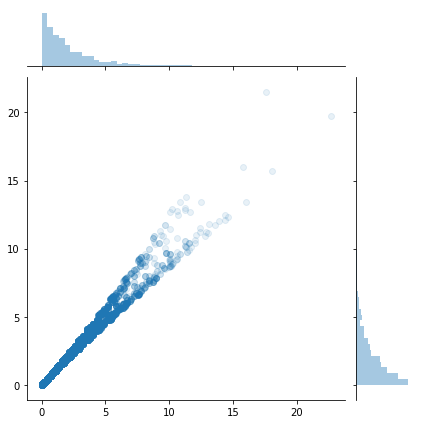

In [477]:
sns.jointplot(cstat,gstat,alpha=.1)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 9.000e+00, 0.000e+00, 2.000e+00, 1.900e+01, 3.000e+00,
        2.000e+00, 3.500e+01, 1.100e+01, 7.400e+01, 2.100e+01, 1.210e+02,
        7.100e+01, 2.060e+02, 4.370e+02, 1.081e+03, 5.316e+03, 1.491e+03,
        5.320e+02, 2.220e+02, 1.270e+02, 7.600e+01, 2.700e+01, 4.500e+01,
        3.000e+01, 6.000e+00, 1.500e+01, 0.000e+00, 6.000e+00, 0.000e+00,
        5.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([-3.90787882, -3.77132262, -3.63476642, -3.49821022, -3.36165401,
        -3.22509781, -3.08854161, -2.95198541, -2.81542921, -2.67887301,
        -2.5423168 , -2.4057606 , -2.2692044 , -2.1326482 , -1.996092  ,
        -1.85953579, -1.72297959, -1.58642339, -1.44986719, -1.31331099,
        -1.17675478, -1.04019858, -0.90364238, -0.76708618, -0.63052998,
        -0.

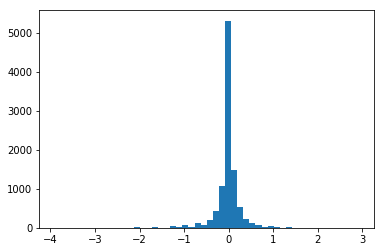

In [478]:
plt.hist(cstat-gstat,bins=50)

This looks relatively correct for the alpha level. What about beta? 

In [479]:
q = np.array([.5,.3,.2])
cstat,gstat = simulate_samples(simsize,n,p,q)

for i in alpha:
    crit_val = ss.chi2(df=2).ppf(1-i)
    print(i,sum(cstat < crit_val),sum(gstat < crit_val),'\n')

0.05 0 0 

0.01 0 0 

0.005 0 0 

0.001 0 0 

0.0001 0 0 



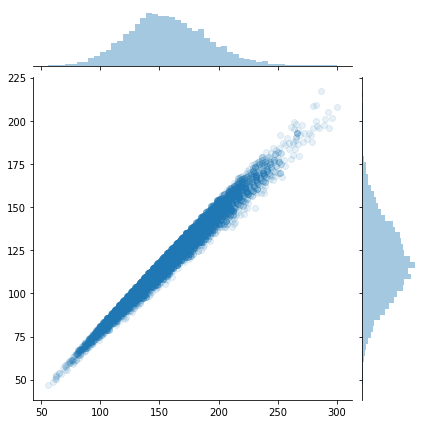

In [480]:
sns.jointplot(cstat,gstat,alpha=.1)

(array([  3.,   8.,  13.,  34.,  52., 115., 164., 216., 312., 414., 479.,
        541., 550., 704., 610., 712., 613., 570., 564., 530., 465., 406.,
        326., 268., 253., 227., 177., 144.,  95.,  69.,  76.,  66.,  37.,
         45.,  38.,  26.,  14.,  19.,  14.,   1.,   7.,   7.,   3.,   4.,
          1.,   3.,   2.,   1.,   1.,   1.]),
 array([ 8.87679723, 10.64069587, 12.40459452, 14.16849316, 15.93239181,
        17.69629045, 19.4601891 , 21.22408774, 22.98798639, 24.75188503,
        26.51578368, 28.27968232, 30.04358097, 31.80747961, 33.57137826,
        35.3352769 , 37.09917555, 38.86307419, 40.62697284, 42.39087148,
        44.15477013, 45.91866877, 47.68256742, 49.44646606, 51.21036471,
        52.97426335, 54.73816199, 56.50206064, 58.26595928, 60.02985793,
        61.79375657, 63.55765522, 65.32155386, 67.08545251, 68.84935115,
        70.6132498 , 72.37714844, 74.14104709, 75.90494573, 77.66884438,
        79.43274302, 81.19664167, 82.96054031, 84.72443896, 86.4883376 ,
 

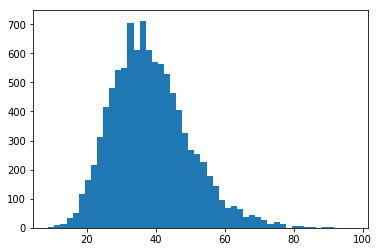

In [481]:
plt.hist(cstat-gstat,bins=50)

So it appears that the more that the true distribution sampled over and over again diverges from the distribution specified in $H_0$, we shift from something like a Laplace Distribution centered at 0 to something like a Chi Squared or Gamma or Skewed and Positive EV distribution. This looks roughly like the Variance Gamma Distribution, or something like that, which has support on the entire real line, and can be set to have a mean and a certain dispersion and skewness. 

We can try and figure out some kind of way to generate a new hypothesis each time, versus a null hypothesis, and the compute values and make a technical data set to look at:

In [482]:
def new_hypothesis(p,t):
    q = p + np.random.uniform(size=len(p))
    q /= sum(q)
    return q

def entropy(p):
    return sum(-p*np.log(p))

def kldiv(p,q):
    return sum(p*np.log(p/q))
    
def test_battery(simsize,n,p,t):
    cstat = np.zeros(simsize)
    gstat = np.zeros(simsize)
    ntropy = np.zeros(simsize)
    kl_div = np.zeros(simsize)
    samplesize = np.random.poisson(lam=n,size=simsize)
    cols = ['Sample Size','Chi-Squared Statistic','G Statistic','True Entropy','KL-Divergence']
    df = pd.DataFrame(columns = cols)
    for i in range(simsize):
        prob = new_hypothesis(p,t)
        x = np.random.multinomial(samplesize[i],pvals=prob,size=1)
        cstat[i] = Chi_Sq(x,samplesize[i],p)
        gstat[i] = G_Stat(x,samplesize[i],p)
        ntropy[i] = entropy(prob)
        kl_div[i] = kldiv(p,prob)
    df['Sample Size'] = samplesize
    df['Chi-Squared Statistic'] = cstat
    df['G Statistic'] = gstat
    df['True Entropy'] = ntropy
    df['KL-Divergence'] = kl_div
    return df
c = 4
p = np.ones(c)/c
n = 150
t = .25
simsize = 25000
df = test_battery(simsize,n,p,t)
df.head(15)

,Sample Size,Chi-Squared Statistic,G Statistic,True Entropy,KL-Divergence
0,138,22.173913,24.173583,1.311136,0.086522
1,147,1.544218,1.545626,1.371976,0.014086
2,138,26.000000,25.746759,1.320714,0.067835
3,142,10.169014,9.666156,1.349687,0.036663
4,152,2.368421,2.351701,1.376637,0.010074
5,164,19.658537,21.954811,1.345737,0.043523
6,150,30.106667,32.882959,1.291512,0.110688
7,164,18.682927,19.700805,1.337469,0.053912
8,146,36.739726,32.394780,1.316951,0.063997
9,147,10.687075,10.521129,1.325482,0.065499


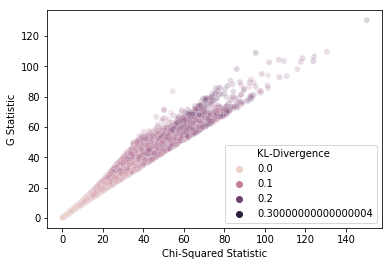

In [483]:
sns.scatterplot(x='Chi-Squared Statistic',y='G Statistic',data=df,hue='KL-Divergence',alpha=.2)

The KL-Divergence is a measure of how much our Null Distribution Diverges from our Alternative Distribution. The entropy measures how random the alternative distribution is. In this case, we can try and look at both:

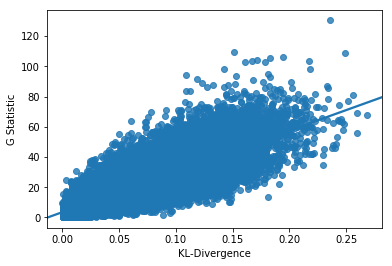

In [484]:
sns.regplot(x='KL-Divergence',y='G Statistic',data=df)

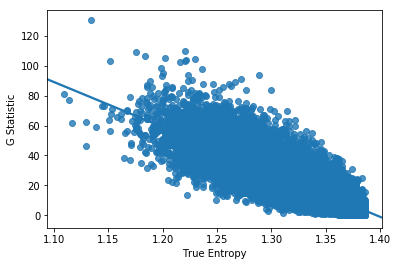

In [485]:
sns.regplot(x='True Entropy',y='G Statistic',data=df)

In this case, we are changing the true probability distributions each time, and comparing it to our null statistic. The Sample Size is also changing each time. We can look at that as well:

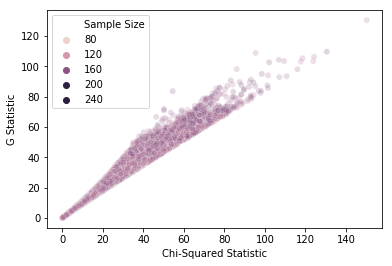

In [486]:
sns.scatterplot(x='Chi-Squared Statistic',y='G Statistic',data=df,hue='Sample Size',alpha=.2)

We can also try looking at the difference between the two test statistics again:

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 4.000e+00, 7.000e+00, 1.000e+01, 1.700e+01, 2.000e+01,
        3.200e+01, 5.400e+01, 9.300e+01, 1.700e+02, 2.470e+02, 4.020e+02,
        6.390e+02, 1.010e+03, 1.689e+03, 2.947e+03, 6.589e+03, 7.563e+03,
        1.518e+03, 7.790e+02, 3.890e+02, 2.680e+02, 1.780e+02, 1.160e+02,
        8.000e+01, 5.300e+01, 4.300e+01, 2.000e+01, 2.200e+01, 1.200e+01,
        1.000e+01, 6.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00]),
 array([-29.16909784, -28.16728584, -27.16547384, -26.16366184,
        -25.16184984, -24.16003784, -23.15822585, -22.15641385,
        -21.15460185, -20.15278985, -19.15097785, -18.14916585,
        -17.14735385, -16.14554185, -15.14372985, -14.14191785,
        -13.14010586, -12.13829386, -11.13648186, -10.13466986,
         -9.13285786,  -8.13104586,  -7.12923386,  -6.12

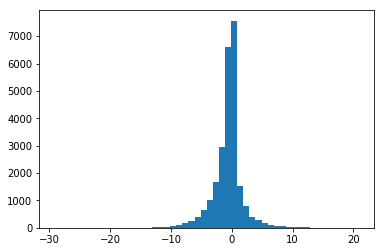

In [487]:
plt.hist(df['Chi-Squared Statistic'] - df['G Statistic'],bins=50)

So realistically, since both distributions measure similar things- how far the cell counts are from the expected cell counts, as is evident by looking at Entropy and KL-Divergence, they achieve similar results, but in some cases, especially for extremely high values, the difference is noticeable. These are the values that we would generally reject anyways, but let's try to look at the critical value here, with 4-1=3 degrees of freedom:

In [492]:
alpha = .05
crit_val = ss.chi2(df=3).ppf(1-alpha)
print(crit_val)

7.814727903251179


In [493]:
df1 = df[(df['G Statistic'] > 7.5)&(df['G Statistic'] < 8)]
df1.head()

,Sample Size,Chi-Squared Statistic,G Statistic,True Entropy,KL-Divergence
31,146,7.589041,7.986753,1.341304,0.042811
111,163,7.920245,7.903628,1.345452,0.044048
195,147,7.639456,7.667057,1.363392,0.023210
221,156,7.589744,7.816335,1.348677,0.041395
371,146,7.698630,7.791169,1.359850,0.026986


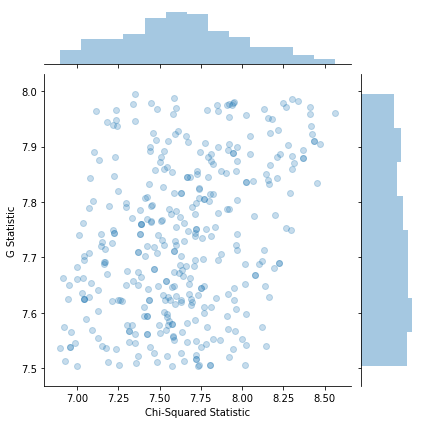

In [491]:
sns.jointplot(x='Chi-Squared Statistic',y='G Statistic',data=df1,alpha=.25)

Are there any cases where we reject one statistic but not the other? Let's actually check:

In [496]:
#Chisq rejects, G accepts
df[(df['Chi-Squared Statistic'] > crit_val) & (df['G Statistic'] <= crit_val)]

,Sample Size,Chi-Squared Statistic,G Statistic,True Entropy,KL-Divergence
384,144,7.944444,7.533870,1.331278,0.060019
538,154,7.922078,7.520489,1.354695,0.035908
1047,155,8.070968,7.774479,1.366754,0.019741
1650,142,7.915493,7.341271,1.372387,0.014805
1925,159,8.018868,7.506661,1.349184,0.036243
3125,151,8.019868,7.652316,1.340214,0.047218
3404,130,7.907692,7.787211,1.379434,0.006921
3561,143,7.965035,7.488973,1.335387,0.049271
3856,140,8.000000,7.552828,1.338070,0.052064
3924,148,7.837838,7.754892,1.368947,0.017676


In [497]:
#Chisq doesnt reject, G does
df[(df['Chi-Squared Statistic'] <= crit_val) & (df['G Statistic'] > crit_val)]

,Sample Size,Chi-Squared Statistic,G Statistic,True Entropy,KL-Divergence
31,146,7.589041,7.986753,1.341304,0.042811
200,142,7.690141,8.051369,1.343388,0.044275
221,156,7.589744,7.816335,1.348677,0.041395
360,152,7.736842,8.376188,1.374666,0.011810
744,154,7.506494,8.265067,1.331552,0.066212
...,...,...,...,...,...
24135,138,7.101449,7.889882,1.371991,0.014792
24493,136,7.352941,7.995040,1.376914,0.009512
24570,142,7.802817,8.227883,1.341044,0.048107
24859,155,7.812903,8.592655,1.356257,0.033677


So out of all of the 25,000 runs of the simulation, there's only about 200 cases where this happens. Looking at the marginals for the jointplot, the Chi-Squared Distribution appears 'bell-shaped' whereas the G Statistic appears more uniform within this range. 